# <center> Modelaje

In [97]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [98]:
# cargar dataset Banco
df = pd.read_csv("Banco.csv", encoding = 'latin1')
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,3,4,2,103,3,6,0,4,0
1,1,4,4,2,98,3,6,0,4,0
2,1,2,4,2,15,3,6,0,4,1
3,1,2,4,2,15,3,6,0,4,0
4,1,4,4,2,68,3,6,0,4,0


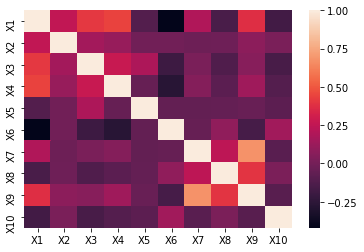

In [99]:
# Generar la matriz de correlacion
# Siguiente usar un Heatmap para verificar
sns.heatmap(df.corr(), 
        xticklabels = df.corr().columns,
        yticklabels = df.corr().columns)

Variables no correlacionadas, si las variables estuvieran correlacionadas el tratamiento debe ser distinto.

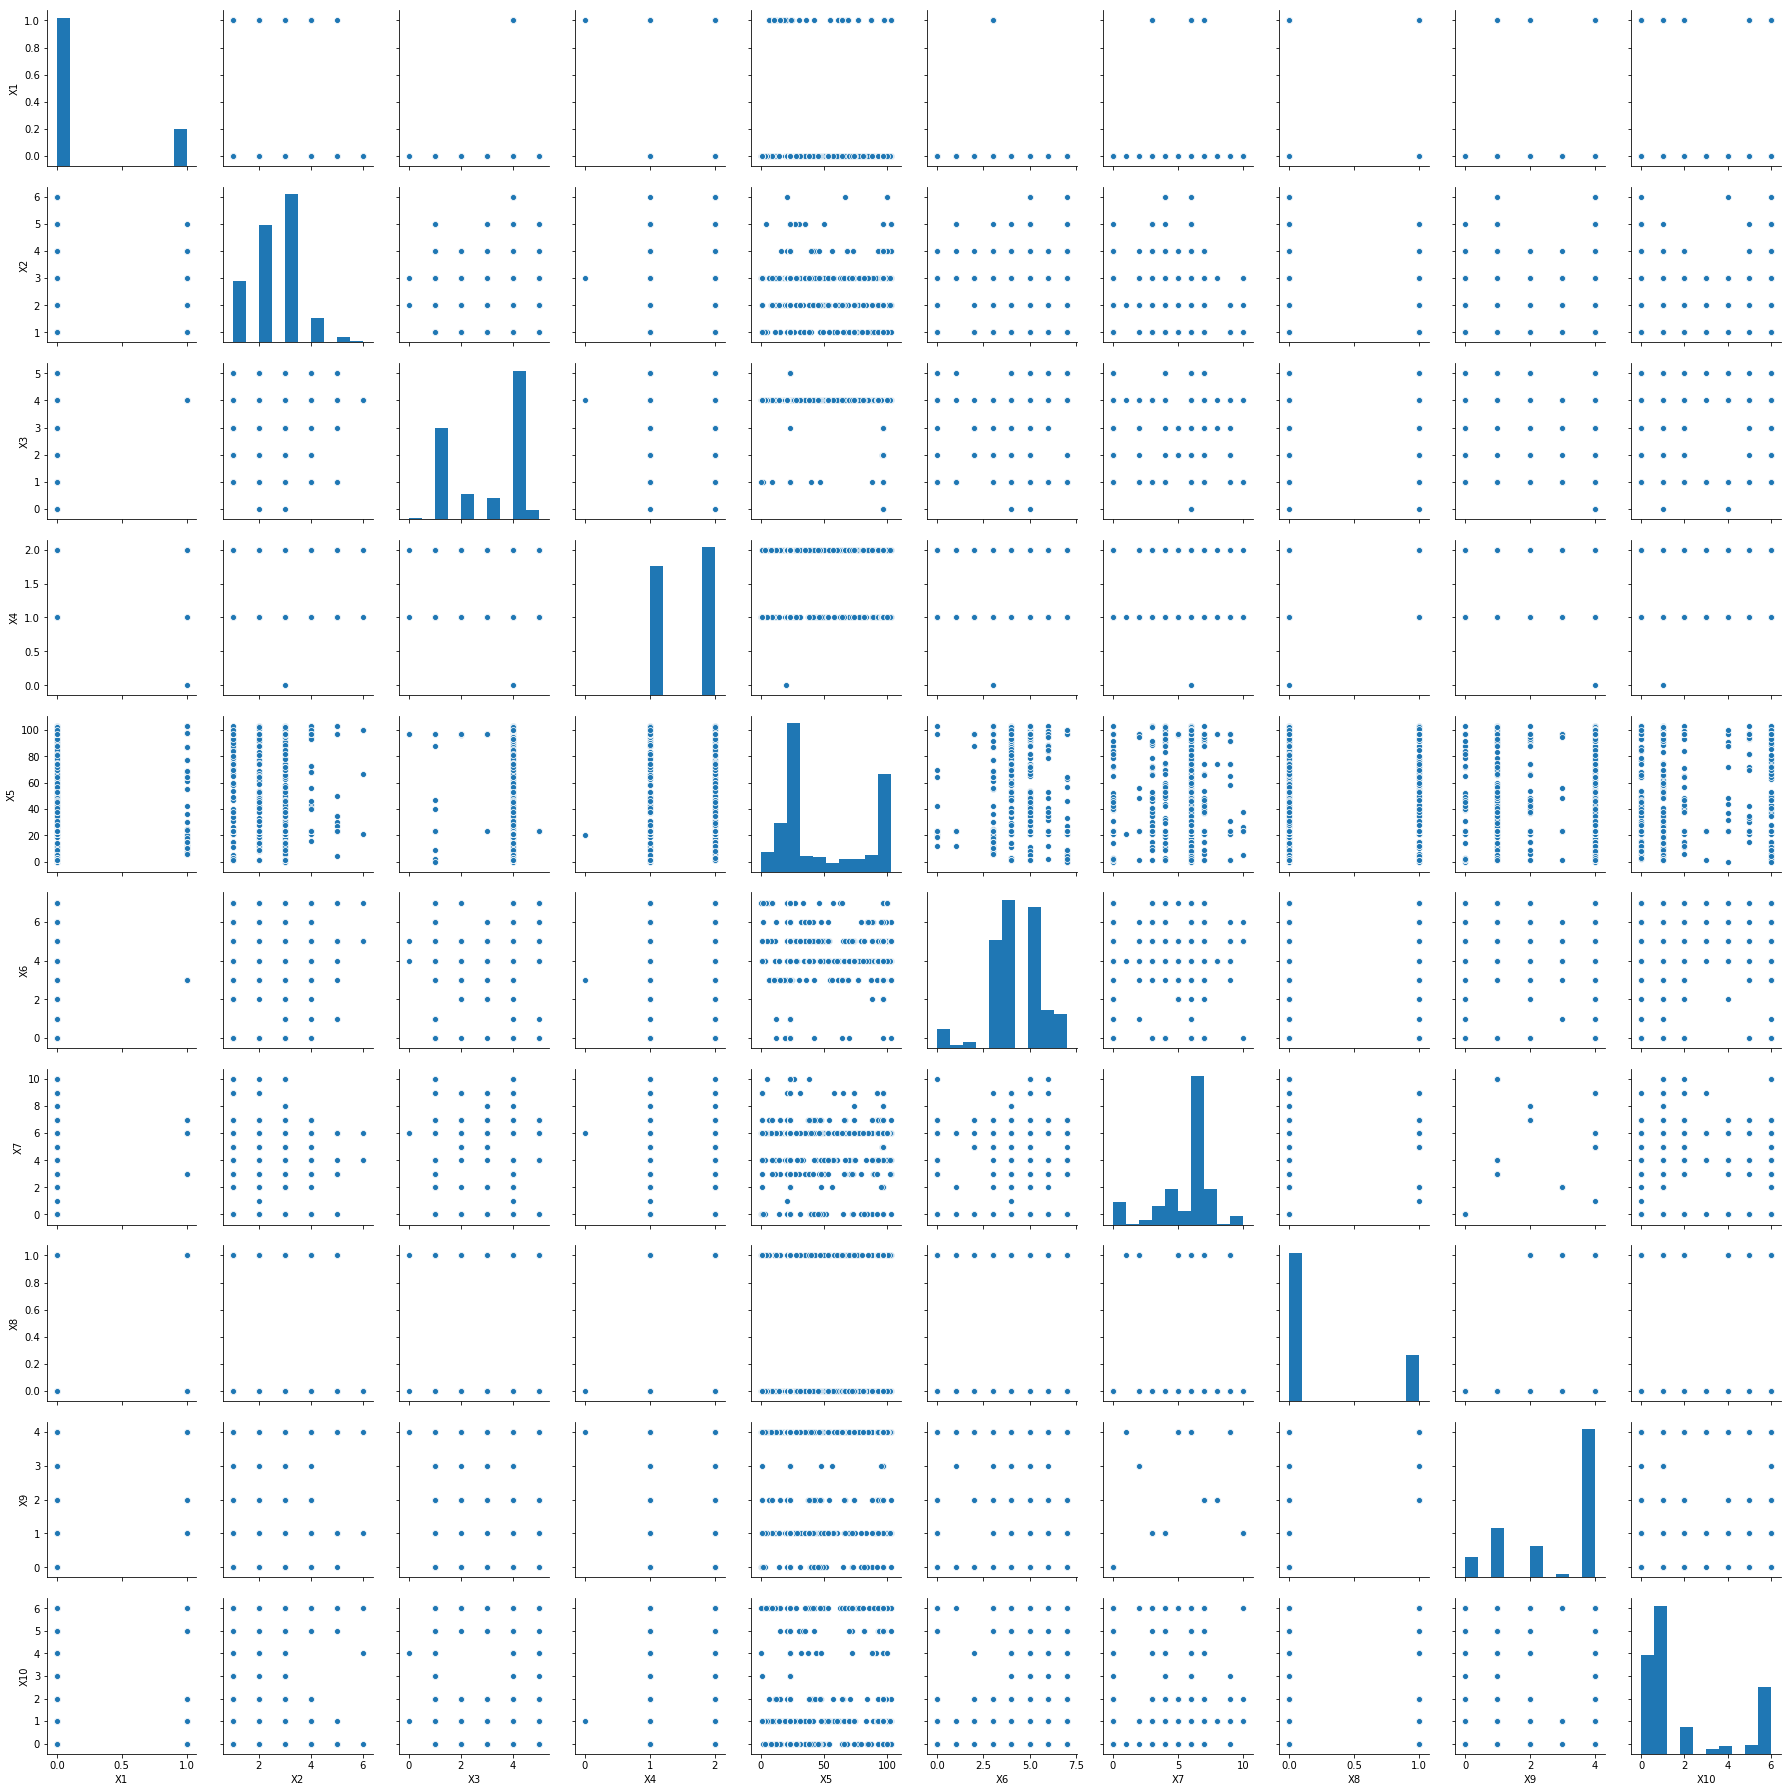

In [100]:
sns.pairplot(df)

In [101]:
# Revisar cuantos clusters existen

#Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [102]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7874405309553175)
For n_clusters = 3, silhouette score is 0.7104192426494024)
For n_clusters = 4, silhouette score is 0.6503448786719183)
For n_clusters = 5, silhouette score is 0.5723417854190902)
For n_clusters = 6, silhouette score is 0.5479550291630262)
For n_clusters = 7, silhouette score is 0.4701051334109723)
For n_clusters = 8, silhouette score is 0.46009414814876876)
For n_clusters = 9, silhouette score is 0.4238845483753134)


Mediante metodologia de silueta se observa que hay 2 o 3 grupos.


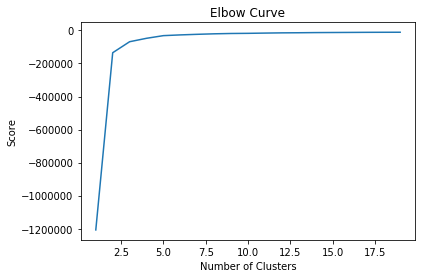

In [103]:
Ks = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Ks]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
plt.plot(Ks,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [104]:
# Para el ejercicio, elijo 3 como un buen valor de K. Pero podría 2, 
# esto se da donde se pierde la derivada.
kmeans = KMeans(n_clusters = 3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.23117338  2.44483363  2.46584939  1.53765324 20.19614711  4.29422067
   5.34325744  0.26094571  2.91943958  2.03677758]
 [ 0.16943522  2.39534884  3.13289037  1.49169435 95.76744186  4.05315615
   5.06312292  0.19269103  2.81727575  1.58803987]
 [ 0.1328125   2.515625    3.953125    1.6015625  57.140625    4.3046875
   4.7890625   0.234375    2.4609375   2.1640625 ]]


In [105]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(df)

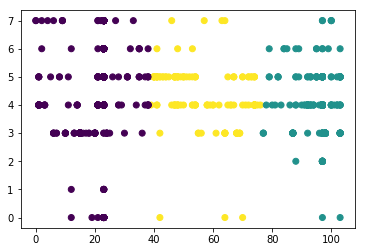

In [106]:
f1 = df['X5'].values
f2 = df['X6'].values

plt.scatter(f1, f2, c = labels)
plt.show()

En el paso anterior no se escalo, ahora se escalara y se realizara nuevamente el kmedias

In [107]:
# ESCALAR LOS DATOS
scaler = StandardScaler()
X = scaler.fit_transform(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.98750000e+00  5.17390078e-01  8.20509663e-01  8.94256112e-01
  -2.29404222e-01 -8.48175024e-01  3.96294027e-01 -2.98653273e-01
   7.51597263e-01 -3.51301630e-01]
 [-5.00000000e-01 -2.08571623e-01 -2.77388090e-01 -2.85665147e-01
   1.95103083e-01  1.74810856e-01  6.34494227e-01 -5.57329337e-01
   2.65579413e-01  1.37526169e-04]
 [-4.88372093e-01 -8.69779675e-02 -3.31399160e-01 -2.63486176e-01
  -4.72351764e-02  2.65735592e-01  4.33817709e-01  1.79427124e+00
   7.07191139e-01  9.70802650e-02]
 [-5.00000000e-01 -7.51069390e-02 -2.85675901e-02 -1.24688744e-01
  -1.31366880e-02  2.11504412e-01 -1.31428260e+00 -5.57329337e-01
  -1.37502813e+00  1.76867333e-01]]


In [109]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)

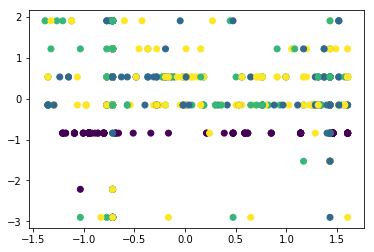

In [110]:
plt.scatter(X[:, 4], X[:, 5], c = labels)
plt.show()

# <center> Modelo LocalOutlierFactor

In [111]:
from sklearn.neighbors import LocalOutlierFactor

In [113]:
clf = LocalOutlierFactor(n_neighbors = 2)
labels = clf.fit_predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


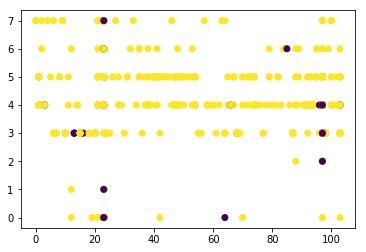

In [114]:
f1 = df['X5'].values
f2 = df['X6'].values

plt.scatter(f1, f2, c = labels)
plt.show()

In [115]:
import collections
cuenta = collections.Counter(list(labels))
cuenta

Counter({1: 919, -1: 81})

# <center> Modelo IsolationForest

In [116]:
from sklearn.ensemble import IsolationForest

In [117]:
clf2 = IsolationForest(random_state = 123).fit(df)
labels2 = clf2.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


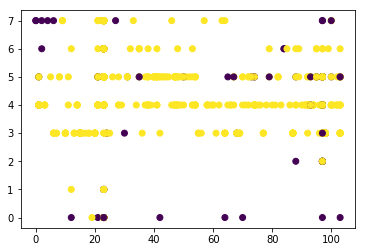

In [118]:
f1 = df['X5'].values
f2 = df['X6'].values

plt.scatter(f1, f2, c = labels2)
plt.show()

In [119]:
import collections
cuenta = collections.Counter(list(labels2))
cuenta

Counter({1: 900, -1: 100})

# <center> Modelo OneClassSVM

In [120]:
from sklearn.svm import OneClassSVM

In [121]:
clf3 = OneClassSVM(gamma = 'auto', random_state = 123).fit(df)
labels3 = clf3.predict(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1177: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


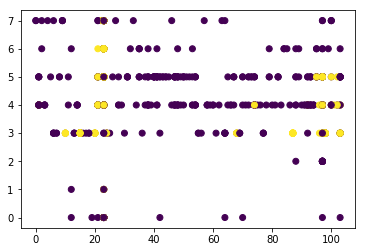

In [122]:
f1 = df['X5'].values
f2 = df['X6'].values

plt.scatter(f1, f2, c = labels3)
plt.show()

In [123]:
import collections
cuenta = collections.Counter(list(labels3))
cuenta

Counter({1: 511, -1: 489})

# <center> Modelo DBSCAN

In [124]:
from sklearn.cluster import DBSCAN

In [126]:
clf4 = DBSCAN(eps = 3, min_samples = 2).fit(df)
labels4 = clf4.labels_

In [127]:
unique, counts = np.unique(labels4, return_counts=True)
dict(zip(unique, counts))

{-1: 73,
 0: 195,
 1: 158,
 2: 9,
 3: 14,
 4: 8,
 5: 10,
 6: 7,
 7: 3,
 8: 4,
 9: 15,
 10: 196,
 11: 23,
 12: 2,
 13: 17,
 14: 10,
 15: 2,
 16: 82,
 17: 9,
 18: 12,
 19: 2,
 20: 2,
 21: 15,
 22: 13,
 23: 4,
 24: 2,
 25: 3,
 26: 5,
 27: 2,
 28: 6,
 29: 2,
 30: 3,
 31: 6,
 32: 2,
 33: 2,
 34: 10,
 35: 4,
 36: 5,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 3,
 43: 2,
 44: 3,
 45: 2,
 46: 2,
 47: 5,
 48: 2,
 49: 5,
 50: 5,
 51: 3,
 52: 2,
 53: 2,
 54: 2,
 55: 3,
 56: 3,
 57: 2,
 58: 3,
 59: 2,
 60: 2}

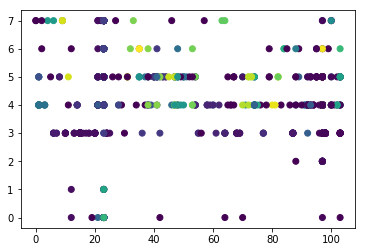

In [128]:
f1 = df['X5'].values
f2 = df['X6'].values

plt.scatter(f1, f2, c = labels4)
plt.show()

Tomar las observaciones que los modelos dieron como outliers para bajar los falsos positivos

In [129]:
df['Modelo_1'] = list(labels)
df['Modelo_2'] = list(labels2)
df['Modelo_3'] = list(labels4)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Modelo_1,Modelo_2,Modelo_3
0,1,3,4,2,103,3,6,0,4,0,1,1,0
1,1,4,4,2,98,3,6,0,4,0,1,1,0
2,1,2,4,2,15,3,6,0,4,1,1,1,1
3,1,2,4,2,15,3,6,0,4,0,1,1,1
4,1,4,4,2,68,3,6,0,4,0,1,1,2


In [131]:
df2 = df[(df['Modelo_1'] == -1) & (df['Modelo_2'] == -1) & (df['Modelo_3'] == -1)]
df2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Modelo_1,Modelo_2,Modelo_3
881,0,2,4,1,64,0,6,1,4,2,-1,-1,-1


In [132]:
1/1000

0.001

In [133]:
df.iloc[881]

X1           0
X2           2
X3           4
X4           1
X5          64
X6           0
X7           6
X8           1
X9           4
X10          2
Modelo_1    -1
Modelo_2    -1
Modelo_3    -1
Name: 881, dtype: int64

In [137]:
# asignarle 1 a los posibles atipicos encontrados, 0 a los demas
df['Color'] = 0
df['Color'].iloc[881] = 1
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Modelo_1,Modelo_2,Modelo_3,Color
0,1,3,4,2,103,3,6,0,4,0,1,1,0,0
1,1,4,4,2,98,3,6,0,4,0,1,1,0,0
2,1,2,4,2,15,3,6,0,4,1,1,1,1,0
3,1,2,4,2,15,3,6,0,4,0,1,1,1,0
4,1,4,4,2,68,3,6,0,4,0,1,1,2,0


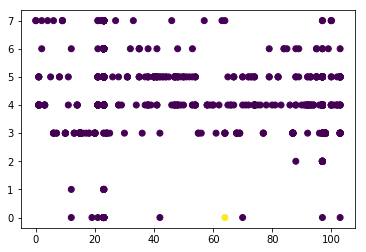

In [139]:
f1 = df['X5'].values
f2 = df['X6'].values

plt.scatter(f1, f2, c = df['Color'])
plt.show()